In [51]:
import math

class paint_bot():
    def __init__(self,r):
        self.r = r  # length of rope
        self.cmd_x = 0 # commanded position
        self.x = 0
        self.dist_to_go = 0
        self.v = 0
        self.theta = math.pi * 3 / 2  # theta is measured relative to trolly
        self.omega = 0  # d theta / dt
        self.alpha = 0  # d omega / dt
        self.t = 0 
        self.max_v = 150 # mm/s
        self.g = -9800 #mm /s^2
        self.acc_dec = .2
        self.acc_dec_dist = self.max_v*self.acc_dec/2
        self.acc = self.max_v / self.acc_dec 
        self.tp_x = 0
        self.damping = .00001 * r
    def cmd(self,cmd_x):
        self.cmd_x = cmd_x
        
    def update(self,t):
        dt = t-self.t
        self.t = t
        v_old = self.v
        self.dist_to_go = self.cmd_x - self.x
        sign = 1 if self.dist_to_go >=0 else -1
        
        limiting_decel_v = math.sqrt(2 * self.acc*abs(self.dist_to_go))
        
        limiting_accel_v = self.v + self.acc * dt
        
        self.v = min([limiting_accel_v,self.max_v,limiting_decel_v]) * sign
        if dt>0:
            realized_acc = (v_old-self.v)/dt
        else: 
            print("dt = 0!  Something's fishy")
            realized_acc = 0
        self.x = self.x + self.v*dt
        
        self.alpha = -math.sin(self.theta)/self.r*realized_acc + self.g*math.cos(self.theta)/self.r - self.omega*self.damping
        self.omega = self.omega + self.alpha * dt
        self.theta = self.theta + self.omega * dt 
        self.tp_x = self.x + math.cos(self.theta) * self.r

bot.x bot.theta


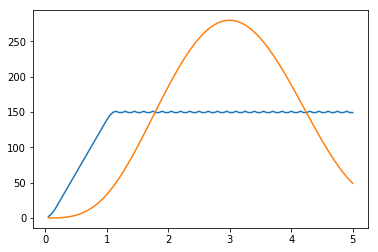

In [56]:
import matplotlib.pyplot as plt

bot = paint_bot(6000)
bot.cmd(150)
print('bot.x','bot.theta')
t = .05
t_arr = []
x_arr = []
tp_x_arr = []

while t < 5:
    bot.update(t)
#     print("bot.x",'{:01.1f}'.format(bot.x),"dist to go:",'{:06.2f}'.format(bot.dist_to_go),"v",'{:06.2f}'.format(bot.v),
#          "theta",'{:01.3f}'.format(bot.theta))
    t_arr.append(t)
    x_arr.append(bot.x)
    tp_x_arr.append(bot.tp_x)
    t+=.05
plt.plot(t_arr,x_arr,t_arr,tp_x_arr)
plt.show()

In [5]:
import math

math.sin(0) 

0.0